## Observations and Insights 

In [161]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [189]:
# Checking the number of mice.
print(f"Number of Unique Mice: {len(combined_data['Mouse ID'].unique())}")

Number of Unique Mice: 249


In [192]:
combined_data_index = combined_data.set_index('Mouse ID')
combined_data_index.head(15)
# prints out data indexed by mouse ID, with timepoints in chronological order
# I think it's because the columns before the timpoint are all identical from mouse to mouse
# and timepoint is the first variable with the different values for a single mouse
# if I moved the tumore column left, the order would be by increasing tumor volume.
# I can manipulate that by using ascend = True or False function.

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
k403,Ramicane,Male,21,16,25,33.464577,1
k403,Ramicane,Male,21,16,30,31.099498,1
k403,Ramicane,Male,21,16,35,26.546993,1
k403,Ramicane,Male,21,16,40,24.365505,1


In [201]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
counts = combined_data[['Mouse ID', 'Timepoint']].value_counts()
# value counts returns a series

counts >= 2
# how to only print values for which this is True?

#DO

Mouse ID  Timepoint
g989      20            True
          15            True
          10            True
          5             True
          0             True
                       ...  
i334      20           False
          15           False
          10           False
          5            False
z969      45           False
Length: 1888, dtype: bool

In [165]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_mouse_data = combined_data_index.loc['g989']
g989_mouse_data.head(20)
# do I need to separate the two duplicates since there's different results?

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [203]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data_unique = combined_data.drop_duplicates(subset=['Mouse ID','Timepoint'], keep = 'first')


In [204]:
# Checking the number of mice in the clean DataFrame.
                                
print(f" Number of mice in clean DF: {len(combined_data_unique['Mouse ID'].unique())}")
# why is the number the same as before it was clean?

 Number of mice in clean DF: 249


## Summary Statistics

In [168]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_regimen = combined_data_unique.groupby('Drug Regimen')

drug_regimen_dict = {'Mean': drug_regimen['Tumor Volume (mm3)'].mean(),
                     'Median': drug_regimen['Tumor Volume (mm3)'].median(),
                     'Standard Deviation': drug_regimen['Tumor Volume (mm3)'].std(),
                     'Standard Error of Means': drug_regimen['Tumor Volume (mm3)'].sem()}
drug_regimen_stats = pd.DataFrame(drug_regimen_dict)
drug_regimen_stats.head()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary dataframe.



,Mean,Median,Standard Deviation,Standard Error of Means
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466


In [169]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0.5, 1.0, 'Timepoint Count Per Drug Regimen')

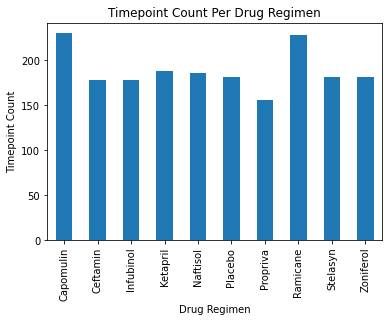

In [206]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

time_point_count = drug_regimen["Timepoint"].count()

drug_regimen_TP_count = drug_regimen['Timepoint'].value_counts()

time_point_count.plot.bar()
plt.ylabel('Timepoint Count')
plt.title('Timepoint Count Per Drug Regimen')


In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


Number of Males: 125
Number of Females: 124


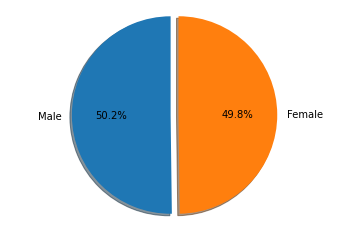

In [239]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Count number of male and females
# create a DF with only one line per Mouse ID and loop through the list to count each number of sex. Assuming there are only females and males, which was verified with .value_counts())
sex_df = combined_data_unique.drop_duplicates(subset = ['Mouse ID', 'Sex'], keep = 'first')
male = 0
female = 0
for sex in sex_df['Sex']:
    if sex == 'Male':
        male = male + 1
    if sex == 'Female':
        female = female +1
print(f"Number of Males: {male}")
print(f"Number of Females: {female}")

# create pie chart
labels = 'Male', 'Female'
sizes = [male, female]
explode = (0, 0.08)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [281]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp_tv = combined_data_unique.drop_duplicates(subset = ['Mouse ID'], keep = 'last')
set_drug_asindex = last_tp_df.set_index('Drug Regimen')
last_tp_tv_4_drugs = last_tp_4_df.loc[['Ramicane', 'Infubinol', 'Ceftamin', 'Capomulin']]
last_tp_tv_4_drugs
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,45,22.050126,1
Ramicane,g791,Male,11,16,45,29.128472,1
Ramicane,s508,Male,1,17,45,30.276232,0
Ramicane,m546,Male,18,16,45,30.564625,1
Ramicane,z578,Male,11,16,45,30.638696,0
...,...,...,...,...,...,...,...
Capomulin,s710,Female,1,23,45,40.728578,1
Capomulin,l509,Male,17,21,45,41.483008,3
Capomulin,r944,Male,12,25,45,41.581521,2


In [283]:
data = np.array(last_tp_tv_4_drugs['Tumor Volume (mm3)'])
q3, q1 = np.percentile(data, [75 ,25])
iqr = q3 - q1
outlier_upper_bound = q3 + 1.5 * iqr
outlier_lower_bound = q1 - 1.5 * iqr

print(f'The IQR is: {iqr}')
print(f'The lower bound is: {outlier_limit_bottom}')
print(f'The upper bound is : {outlier_limit_top}')

# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_outliers = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for outlier in last_tp_tv_4_drugs['Tumor Volume (mm3)']:
    if outlier >= outlier_upper_bound:
        print(tumor_vol_outliers.append(outlier))
    if outlier <= outlier_lower_bound:
        print(tumor_vol_outliers.append(outlier))
else:
    print ('There are no outliers.')

    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

The IQR is: 22.742517952499995
The lower bound is: 3.0739668737500097
The upper bound is : 94.04403868374999
There are no outliers.


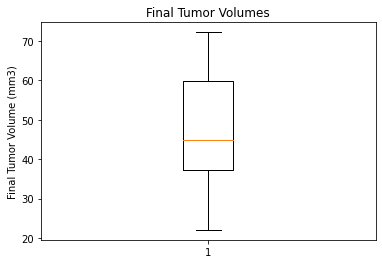

In [297]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(last_tp_tv_4_drugs['Tumor Volume (mm3)'])
plt.show()

## Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint'>

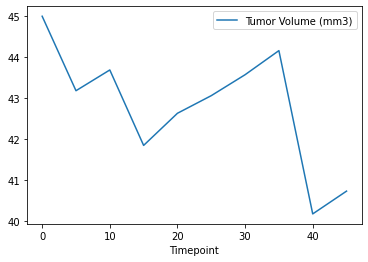

In [320]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
combined_data_unique_2 = combined_data_unique.set_index('Drug Regimen')
capomulin = combined_data_unique_2.loc['Capomulin']

mouse_ID = capomulin.set_index('Mouse ID')
mouse_s710 = mouse_ID.loc['s710']
mouse_s710


line_df = mouse_s710[['Timepoint', 'Tumor Volume (mm3)']]

line_df.plot.line(x = 'Timepoint')

<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

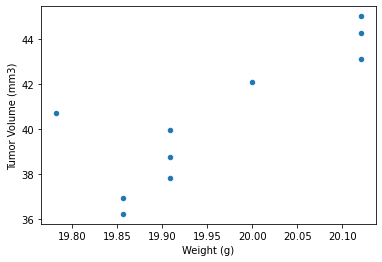

In [325]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

tumor_volumes_capomulin = capomulin[['Timepoint', 'Weight (g)', 'Tumor Volume (mm3)']].groupby('Timepoint')
avg_tumor_volumes_capomulin = tumor_volumes_capomulin.mean('Tumor Volume (mm3)')
columns = ['Weight (g)', 'Tumor Volume (mm3)']
avg_tumor_volumes_capomulin.plot.scatter(x = 'Weight (g)', y = 'Tumor Volume (mm3)')


## Correlation and Regression

In [337]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = avg_tumor_volumes_capomulin.corr(method = 'pearson')

from scipy.stats import linregress
 # Print out the r-squared value along with the plot.
x_values = avg_tumor_volumes_capomulin['Weight (g)']
y_values = avg_tumor_volumes_capomulin['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
print(f"The Correlation Coefficient is : {correlation}")

The r-squared is: 0.6735964997067523
The Correlation Coefficient is :                     Weight (g)  Tumor Volume (mm3)
Weight (g)            1.000000            0.820729
Tumor Volume (mm3)    0.820729            1.000000
